# Combined data
## Xiaonan Wang
## 17Nov2022

In [1]:
#%matplotlib nbagg
import numpy as np
import matplotlib.pyplot as plt
import scanpy as sc
import pandas as pd
from os import listdir
from os.path import isfile, join
import re
import anndata
import seaborn as sns

plt.rcParams['pdf.fonttype'] = 42
plt.rcParams['ps.fonttype'] = 42

sc.settings.verbosity = 3  # verbosity: errors (0), warnings (1), info (2), hints (3)
sc.logging.print_header()

from matplotlib.colors import LinearSegmentedColormap
cmap = LinearSegmentedColormap.from_list(name='gene_cmap', colors=['lightgrey', 'thistle', 'red', 'darkred']) 

sc.settings.set_figure_params(dpi=80, color_map='viridis', vector_friendly=False,  dpi_save=300)

/cluster/groups/Wangxiaonan/programs/miniconda3/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


scanpy==1.9.3 anndata==0.9.1 umap==0.5.3 numpy==1.23.5 scipy==1.9.1 pandas==1.5.3 scikit-learn==1.2.2 statsmodels==0.13.5 python-igraph==0.10.4 pynndescent==0.5.8


In [14]:
# GSE138181 - Koth 2020 Development
Koth = sc.read('/nfs01data1/Groups/Wangxiaonan/share/rev_MI/GSE138181/write/GSE138181_processed.h5ad', cache=True)
# GSE153170 - Bakker 2021 Development
Bakker = sc.read('/nfs01data1/Groups/Wangxiaonan/share/rev_MI/GSE153170/write/GSE153170_processed.h5ad', cache=True)
# GSE172511 - Sun 2022 Circulation
Sun = sc.read('/nfs01data1/Groups/Wangxiaonan/share/rev_MI/GSE172511/write/GSE172511_processed.h5ad', cache=True)
# GSE159032 - Hu 2022 Nature genetics
Hu = sc.read('/nfs01data1/Groups/Wangxiaonan/share/rev_MI/GSE159032_GSE158919/write/GSE159032_GSE158919_processed_anno.h5ad', cache=True)
# GSE188511 - Kapuria 2022 Development
Kapuria = sc.read('/nfs01data1/Groups/Wangxiaonan/share/rev_MI/GSE188511/write/GSE188511_processed.h5ad', cache=True)
# GSE145980 - Ma 2021 EMBO Reports
Ma = sc.read('/nfs01data1/Groups/Wangxiaonan/share/rev_MI/GSE145980/write/GSE145980_processed.h5ad', cache=True)

In [15]:
# adata: .X:row: cell, col: gene -> scaled matrix; .var: high variable genes; .obs: cell annotation
# adata.raw: .X: log norm, .var: all expressed genes
Koth = anndata.AnnData(X=Koth.raw.X, obs=Koth.obs, var=Koth.raw.var, obsm=Koth.obsm)
Bakker = anndata.AnnData(X=Bakker.raw.X, obs=Bakker.obs, var=Bakker.raw.var, obsm=Bakker.obsm)
Sun = anndata.AnnData(X=Sun.raw.X, obs=Sun.obs, var=Sun.raw.var, obsm=Sun.obsm)
Hu = anndata.AnnData(X=Hu.raw.X, obs=Hu.obs, var=Hu.raw.var, obsm=Hu.obsm)
Kapuria = anndata.AnnData(X=Kapuria.raw.X, obs=Kapuria.obs, var=Kapuria.raw.var, obsm=Kapuria.obsm)
Ma = anndata.AnnData(X=Ma.raw.X, obs=Ma.obs, var=Ma.raw.var, obsm=Ma.obsm)

In [16]:
print('Koth'+str(Koth.shape))
print('Bakker'+str(Bakker.shape))
print('Sun'+str(Sun.shape))
print('Hu'+str(Hu.shape))
print('Kapuria'+str(Kapuria.shape))
print('Ma'+str(Ma.shape))

Koth(13636, 20821)
Bakker(1438, 14217)
Sun(8500, 22920)
Hu(189807, 26791)
Kapuria(5360, 18903)
Ma(70724, 27170)


In [17]:
adata = [Koth, Bakker, Sun, Hu, Kapuria, Ma]

In [18]:
for i in range(len(adata)):
    print(adata[i].shape)
    adata[i].var_names_make_unique()

(13636, 20821)
(1438, 14217)
(8500, 22920)
(189807, 26791)
(5360, 18903)
(70724, 27170)


In [19]:
#combine and save the raw counts
adata1 = anndata.AnnData.concatenate(*adata)

In [20]:
adata1.shape

(289465, 9468)

In [21]:
adata1.obs.to_csv('adata_all.csv')

In [24]:
adata1.obs_keys()

['Index',
 'Age',
 'Development_stage',
 'Condition',
 'Day',
 'Strain',
 'Tissue',
 'StudyID',
 'CellType',
 'Genotype',
 'Organism',
 'Gender',
 'Author',
 'n_genes',
 'n_genes_by_counts',
 'log1p_n_genes_by_counts',
 'total_counts',
 'log1p_total_counts',
 'pct_counts_in_top_50_genes',
 'pct_counts_in_top_100_genes',
 'pct_counts_in_top_200_genes',
 'pct_counts_in_top_500_genes',
 'total_counts_mt',
 'log1p_total_counts_mt',
 'pct_counts_mt',
 'batch',
 'n_counts',
 'phase',
 'S_score',
 'G2M_score',
 'EGFP',
 'FishID',
 'Treatment',
 'RFP',
 'db_scores',
 'predicted_db',
 'FishID_new',
 'CellID',
 'Cell',
 'orig.ident',
 'nCount_RNA',
 'nFeature_RNA',
 'percent.mito',
 'time',
 'morphine',
 'AV',
 'inhib',
 'so.far.ident.subtypes',
 'so.far.ident',
 'RNA_snn_res.4',
 'seurat_clusters',
 'work.ident',
 'fibro.subtypes',
 'is.inhib',
 'split.inhib',
 'zoom.ident',
 'zoom.subtypes',
 'plot.ident',
 'CM.ident',
 'paper.ident',
 'RNA_snn_res.2',
 'RNA_snn_res.3',
 'RNA_snn_res.3.5',
 'w

In [27]:
adata1.obs['Day'] = adata1.obs['Day'].astype(str)

In [ ]:
del adata1.obs['predicted_db']

In [33]:
adata1.write('./write/combined_inner.h5ad')

In [34]:
adata = sc.read('./write/combined_inner.h5ad')

In [35]:
sc.external.pp.harmony_integrate(adata, key='Index', adjusted_basis = 'X_pca_harmony_Index')

2022-11-30 18:05:31,343 - harmonypy - INFO - Iteration 1 of 10
INFO:harmonypy:Iteration 1 of 10
2022-11-30 18:17:48,896 - harmonypy - INFO - Iteration 2 of 10
INFO:harmonypy:Iteration 2 of 10
2022-11-30 18:29:42,131 - harmonypy - INFO - Iteration 3 of 10
INFO:harmonypy:Iteration 3 of 10
2022-11-30 18:40:40,433 - harmonypy - INFO - Iteration 4 of 10
INFO:harmonypy:Iteration 4 of 10
2022-11-30 18:51:33,581 - harmonypy - INFO - Iteration 5 of 10
INFO:harmonypy:Iteration 5 of 10
2022-11-30 19:03:19,428 - harmonypy - INFO - Iteration 6 of 10
INFO:harmonypy:Iteration 6 of 10
2022-11-30 19:16:40,925 - harmonypy - INFO - Iteration 7 of 10
INFO:harmonypy:Iteration 7 of 10
2022-11-30 19:27:17,749 - harmonypy - INFO - Iteration 8 of 10
INFO:harmonypy:Iteration 8 of 10
2022-11-30 19:38:36,257 - harmonypy - INFO - Iteration 9 of 10
INFO:harmonypy:Iteration 9 of 10
2022-11-30 19:52:12,665 - harmonypy - INFO - Iteration 10 of 10
INFO:harmonypy:Iteration 10 of 10
2022-11-30 20:02:20,854 - harmonypy - 

In [36]:
sc.pp.neighbors(adata, use_rep = 'X_pca_harmony_Index')

computing neighbors
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:01:35)


In [37]:
sc.tl.umap(adata)

computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:11:26)


In [38]:
adata.write('./write/combined_inner.h5ad')

# Data Integration

In [61]:
adata = sc.read('./write/combined_inner.h5ad')

In [39]:
adata.raw = adata

In [40]:
# find highly variable genes
# parameters are mainly selected depends on user preference
sc.pp.highly_variable_genes(
    adata, min_mean=0.02, max_mean=3, min_disp=0.3, batch_key='Index', inplace=True)

extracting highly variable genes
    finished (0:01:36)
--> added
    'highly_variable', boolean vector (adata.var)
    'means', float vector (adata.var)
    'dispersions', float vector (adata.var)
    'dispersions_norm', float vector (adata.var)


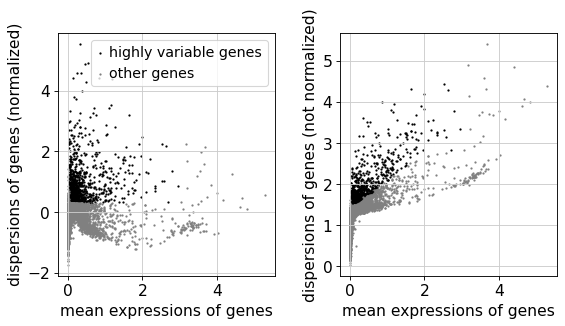

In [41]:
sc.pl.highly_variable_genes(adata)

In [42]:
print(np.sum(adata.var.highly_variable))

1360


In [43]:
# scale for pca
sc.pp.scale(adata)
# pca
sc.tl.pca(adata, svd_solver='arpack')

... as `zero_center=True`, sparse input is densified and may lead to large memory consumption
computing PCA
    on highly variable genes
    with n_comps=50
    finished (0:00:42)


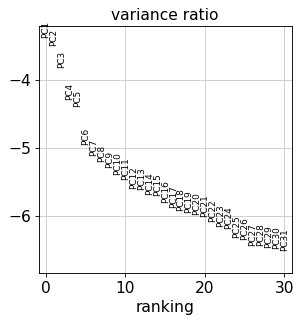

In [44]:
sc.pl.pca_variance_ratio(adata, log=True)

In [ ]:
sc.external.pp.harmony_integrate(adata, key='Index', adjusted_basis = 'X_pca_harmony_Index_combined')

2022-11-30 20:21:11,878 - harmonypy - INFO - Iteration 1 of 10
INFO:harmonypy:Iteration 1 of 10
2022-11-30 20:33:15,291 - harmonypy - INFO - Iteration 2 of 10
INFO:harmonypy:Iteration 2 of 10
2022-11-30 20:44:15,175 - harmonypy - INFO - Iteration 3 of 10
INFO:harmonypy:Iteration 3 of 10
2022-11-30 20:56:05,759 - harmonypy - INFO - Iteration 4 of 10
INFO:harmonypy:Iteration 4 of 10


In [ ]:
sc.pp.neighbors(adata, use_rep = 'X_pca_harmony_Index_combined')

In [ ]:
sc.tl.umap(adata)

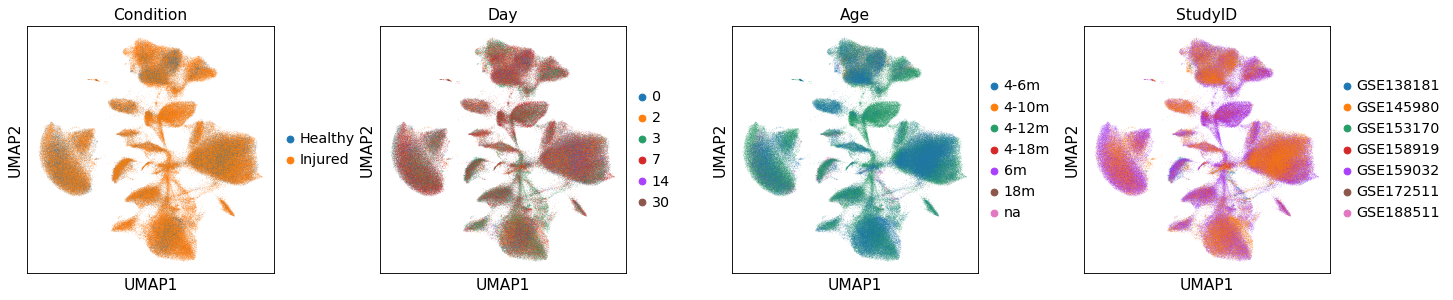

In [50]:
sc.pl.umap(adata, color= ['Condition', 'Day', 'Age', 'StudyID'], wspace=0.3)

In [ ]:
adata.write('./write/combined_inner_overall.h5ad')

In [51]:
pd.crosstab(adata.obs['Day'], adata.obs['StudyID'])

StudyID,GSE138181,GSE145980,GSE153170,GSE158919,GSE159032,GSE172511,GSE188511
Day,,,,,,,
0,4059,14414,0,0,22279,0,0
2,0,29133,0,0,0,0,0
3,9577,0,0,8754,53187,0,0
7,0,19706,1438,10436,78556,8500,5360
14,0,7471,0,0,0,0,0
30,0,0,0,0,16595,0,0


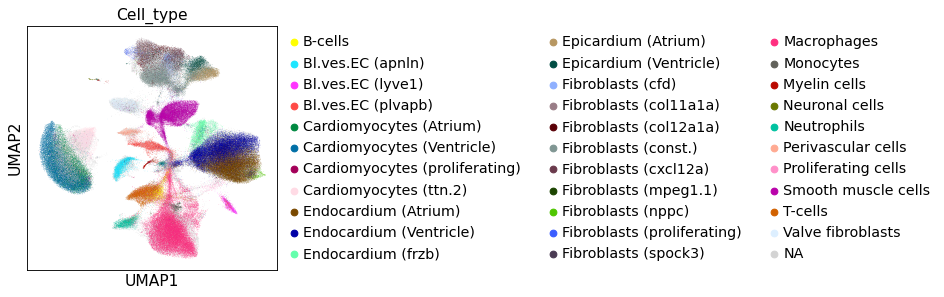

In [52]:
# get the cell annotation done first
sc.pl.umap(adata, color="Cell_type")

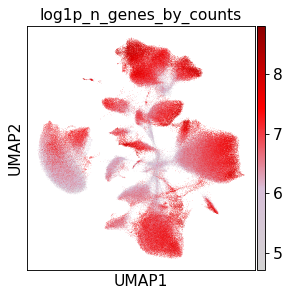

In [57]:
sc.pl.umap(adata, color="log1p_n_genes_by_counts", color_map=cmap)

<AxesSubplot:title={'center':'Cell_type'}, xlabel='UMAP1', ylabel='UMAP2'>

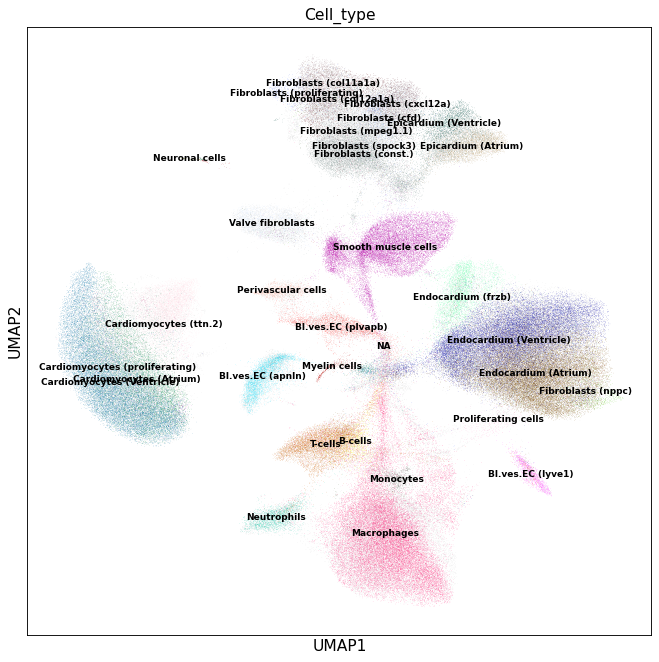

In [55]:
fig, ax = plt.subplots(figsize=(10,10))
sc.pl.umap(adata, color="Cell_type", legend_loc="on data", legend_fontsize="xx-small", ax=ax, show=False)

In [103]:
adata = sc.read('./write/combined_inner_overall.h5ad')

# Leiden clustering (v1)

In [104]:
sc.tl.leiden(adata, resolution=0.8, key_added='Leiden_v1')

running Leiden clustering
    finished: found 24 clusters and added
    'Leiden_v1', the cluster labels (adata.obs, categorical) (0:05:19)


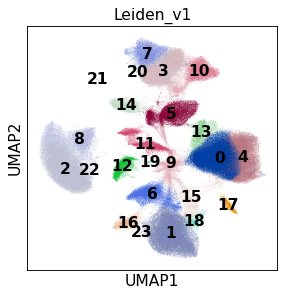

In [105]:
sc.pl.umap(adata, color='Leiden_v1', legend_loc='on data')

In [106]:
adata.write('./write/combined_inner_overall.h5ad')

# Filter out low n_genes cells

In [100]:
adata = sc.read('./write/combined_inner_overall.h5ad')

In [107]:
adata.raw = adata

In [108]:
adata.shape

(289465, 9468)

In [109]:
adata = adata[adata.obs['Leiden_v1'] != '9'].copy()

In [110]:
adata.shape

(279384, 9468)

In [111]:
sc.pp.neighbors(adata, use_rep = 'X_pca_harmony_Index_combined')

computing neighbors
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:01:02)


In [112]:
sc.tl.umap(adata)

computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:10:46)


# Leiden clustering (v2)

In [ ]:
sc.tl.leiden(adata, resolution=2, key_added='Leiden_v2')

running Leiden clustering
    finished: found 39 clusters and added
    'Leiden_v2', the cluster labels (adata.obs, categorical) (0:06:24)


/cluster/groups/Wangxiaonan/programs/miniconda3/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


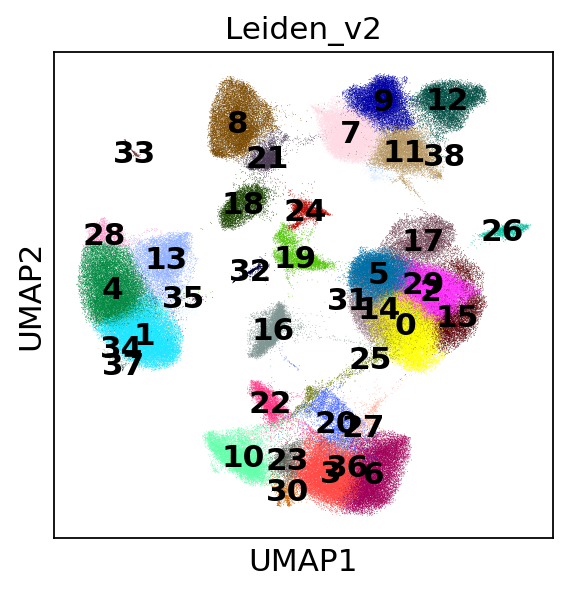

In [ ]:
sc.pl.umap(adata, color='Leiden_v2', legend_loc='on data')

In [30]:
adata = sc.read('./write/combined_inner_overall_filtered.h5ad')

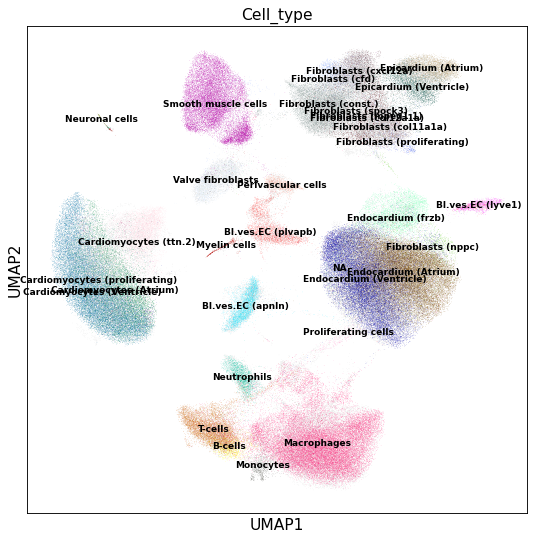

In [31]:
fig, ax = plt.subplots(figsize=(8, 8))
sc.pl.umap(adata, color="Cell_type", legend_loc="on data", legend_fontsize="xx-small", ax=ax, show=False)
plt.savefig('Umap_zebrafish_integrated.png', bbox_inches='tight')

In [114]:
adata.write('./write/combined_inner_overall_filtered.h5ad')

In [134]:
adata.obs['StudyID'].value_counts()

GSE159032    163955
GSE145980     69310
GSE158919     18231
GSE138181     12838
GSE172511      8408
GSE188511      5209
GSE153170      1433
Name: StudyID, dtype: int64

In [135]:
pd.crosstab(adata.obs['StudyID'], adata.obs['Cell_type'])

Cell_type,B-cells,Bl.ves.EC (apnln),Bl.ves.EC (lyve1),Bl.ves.EC (plvapb),Cardiomyocytes (Atrium),Cardiomyocytes (Ventricle),Cardiomyocytes (proliferating),Cardiomyocytes (ttn.2),Endocardium (Atrium),Endocardium (Ventricle),...,Macrophages,Monocytes,Myelin cells,Neuronal cells,Neutrophils,Perivascular cells,Proliferating cells,Smooth muscle cells,T-cells,Valve fibroblasts
StudyID,,,,,,,,,,,,,,,,,,,,,
GSE158919,27,66,91,295,358,1289,33,3110,2582,3161,...,1230,46,24,2,91,95,90,1721,284,392
GSE159032,1251,3386,1067,3011,8901,17316,384,5093,20630,18449,...,28761,972,472,54,1996,1049,408,14458,5986,2167


In [136]:
idx1 = np.in1d(adata.obs['StudyID'], ['GSE159032', 'GSE158919'])

In [137]:
sum(idx1)

182186

In [138]:
163955+18231

182186

In [139]:
idx2 = np.in1d(adata.obs['StudyID'], ['GSE145980', 'GSE138181', 'GSE172511', 'GSE188511', 'GSE153170'])

In [140]:
sum(idx2)

97198

# Cell type definition (Euclidean distance)

In [141]:
adata1 = adata[idx1,:].copy()
adata2 = adata[idx2,:].copy()

In [142]:
X_pca1 = adata1.obsm['X_pca_harmony_Index_combined']
X_pca2 = adata2.obsm['X_pca_harmony_Index_combined']

In [143]:
from sklearn.metrics.pairwise import euclidean_distances
D_sub = euclidean_distances(X_pca2, X_pca1)

In [144]:
print(X_pca1.shape)
print(X_pca2.shape)
print(D_sub.shape)

(182186, 50)
(97198, 50)
(97198, 182186)


In [ ]:
from collections import defaultdict
cl_assigned = []
Rstore = defaultdict(list) # dictionary to store results
for i in range(D_sub.shape[0]):
    CellDis = D_sub[i,:]
    CellDis_sorted = np.argsort(CellDis)[:15]
    cl_assigned.append(np.in1d(range(len(CellDis)), CellDis_sorted))
    Rstore['MinDist'].append(np.min(CellDis[CellDis_sorted]))
    Rstore['MedianDist'].append(np.median(CellDis[CellDis_sorted]))
    Rstore['MaxDist'].append(np.max(CellDis[CellDis_sorted]))
    Rstore['SD'].append(np.std(CellDis[CellDis_sorted]))
    Rstore['CT'].append(adata1[CellDis_sorted,:].obs['Cell_type'].value_counts().index[0])
Rstore = pd.DataFrame.from_dict(Rstore)
Rstore.index = adata2.obs_names

In [147]:
Rstore.head()

,MinDist,MedianDist,MaxDist,SD,CT
0,7.553865,8.222810,8.561747,0.251433,Bl.ves.EC (apnln)
1,5.420816,5.662319,5.876765,0.165889,T-cells
2,7.574820,7.905661,7.990767,0.122258,Bl.ves.EC (apnln)
3,5.034801,5.981318,6.100923,0.277503,Endocardium (Atrium)
4,7.082878,8.466329,8.620239,0.395928,Fibroblasts (cxcl12a)


In [148]:
Rstore.shape

(97198, 5)

In [149]:
Rstore.to_csv('proj_result.csv')

In [156]:
adata2.obs['Cell_type'] = Rstore['CT'].values

<AxesSubplot:title={'center':'Cell_type'}, xlabel='UMAP1', ylabel='UMAP2'>

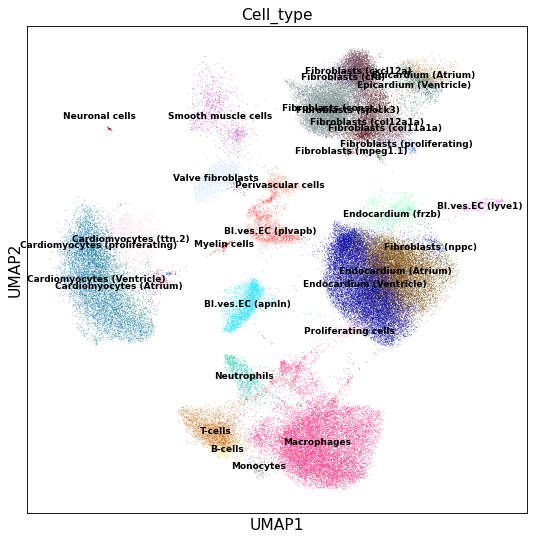

In [159]:
fig, ax = plt.subplots(figsize=(8,8))
sc.pl.umap(adata2, color="Cell_type", legend_loc="on data", legend_fontsize="xx-small", ax=ax, show=False)

In [162]:
adata1.obs_keys()

['Index',
 'Age',
 'Development_stage',
 'Condition',
 'Day',
 'Strain',
 'Tissue',
 'StudyID',
 'CellType',
 'Genotype',
 'Organism',
 'Gender',
 'Author',
 'n_genes',
 'n_genes_by_counts',
 'log1p_n_genes_by_counts',
 'total_counts',
 'log1p_total_counts',
 'pct_counts_in_top_50_genes',
 'pct_counts_in_top_100_genes',
 'pct_counts_in_top_200_genes',
 'pct_counts_in_top_500_genes',
 'total_counts_mt',
 'log1p_total_counts_mt',
 'pct_counts_mt',
 'batch',
 'n_counts',
 'phase',
 'S_score',
 'G2M_score',
 'EGFP',
 'FishID',
 'Treatment',
 'RFP',
 'db_scores',
 'FishID_new',
 'CellID',
 'Cell',
 'orig.ident',
 'nCount_RNA',
 'nFeature_RNA',
 'percent.mito',
 'time',
 'morphine',
 'AV',
 'inhib',
 'so.far.ident.subtypes',
 'so.far.ident',
 'RNA_snn_res.4',
 'seurat_clusters',
 'work.ident',
 'fibro.subtypes',
 'is.inhib',
 'split.inhib',
 'zoom.ident',
 'zoom.subtypes',
 'plot.ident',
 'CM.ident',
 'paper.ident',
 'RNA_snn_res.2',
 'RNA_snn_res.3',
 'RNA_snn_res.3.5',
 'work.ident2',
 'wo

In [183]:
adata1.write('./write/GSE159032.h5ad')
adata2.write('./write/other.h5ad')

In [2]:
adata1 = sc.read('./write/GSE159032.h5ad')
adata2 = sc.read('./write/other.h5ad')

In [ ]:
adata = anndata.concat([adata1,adata2])

In [ ]:
adata.write('./write/All_outer_leidenv2.h5ad')